# Implementing logistic regression on Titanic dataset

In [380]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

## Load the data 

In [381]:
titanic_data = pd.read_csv('train.csv')
titanic_data_test = pd.read_csv('test.csv')

In [382]:
titanic_data.head(10)
titanic_data_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [383]:
print("No. of passenger in the original datset  " +str(len(titanic_data.index)))

No. of passenger in the original datset  891


## Analyzing data 

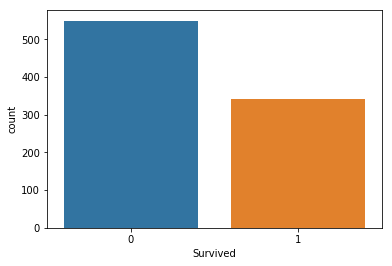

In [384]:
sns.countplot(x='Survived', data = titanic_data)

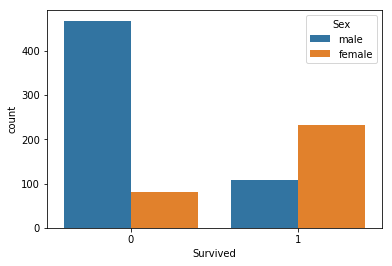

In [385]:
sns.countplot(x="Survived", hue="Sex",data = titanic_data)

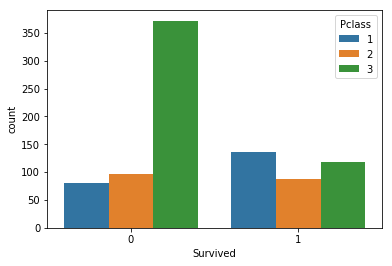

In [386]:
sns.countplot(x="Survived", hue="Pclass", data = titanic_data)

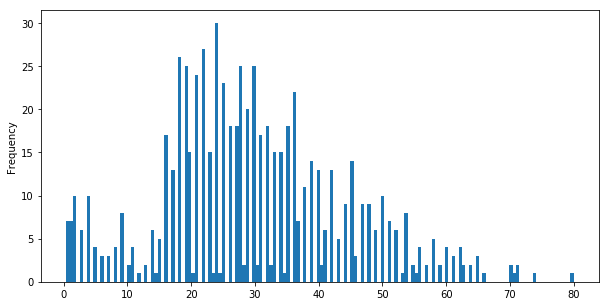

In [387]:
titanic_data["Age"].plot.hist(bins=150,figsize=(10,5))

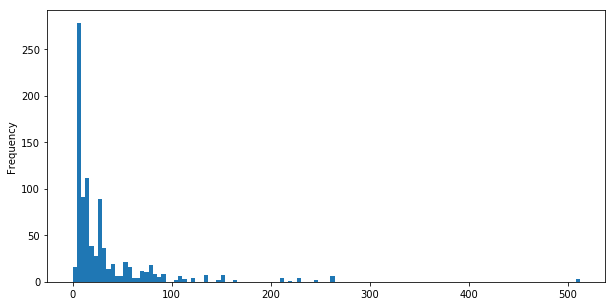

In [388]:
titanic_data["Fare"].plot.hist(bins=120,figsize=(10,5))

In [389]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


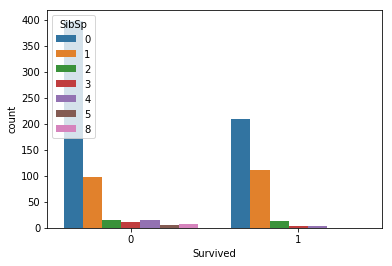

In [390]:
sns.countplot(x='Survived', hue="SibSp",data = titanic_data)

## Data wrangling 

In [391]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [392]:
 titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

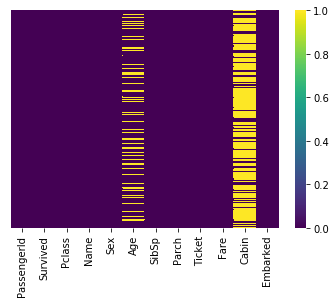

In [393]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap ="viridis")

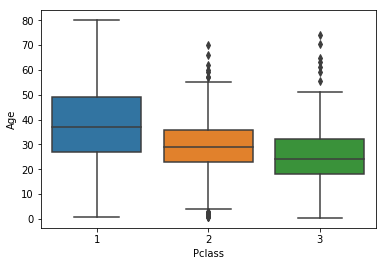

In [394]:
sns.boxplot(x='Pclass', y='Age', data = titanic_data)

### Lets drop the Cabin column

In [395]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data_test.drop("Cabin", axis=1, inplace=True)

In [396]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [397]:
titanic_data.dropna(inplace=True)
titanic_data_test.dropna(inplace=True)

In [398]:
titanic_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,Q


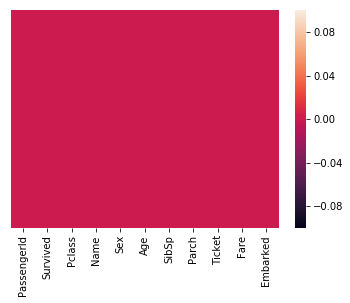

In [399]:
sns.heatmap(titanic_data.isnull(), yticklabels = False)

In [400]:
#lets check

In [401]:
titanic_data.isnull().sum()
titanic_data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [402]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)

In [403]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [404]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first = True)

In [405]:
titanic_data = pd.concat([titanic_data,sex,embark,pcl], axis=1)

In [406]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [407]:
titanic_data.head(6)
titanic_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

## Training and testing  data

In [408]:
from sklearn.linear_model import LogisticRegression

In [409]:
logmodel = LogisticRegression()
x = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [410]:
logmodel.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [411]:
sex_t= pd.get_dummies(titanic_data_test['Sex'], drop_first = True)

In [412]:
embark_t= pd.get_dummies(titanic_data_test['Embarked'], drop_first = True)

In [413]:
pcl_t= pd.get_dummies(titanic_data_test['Pclass'], drop_first = True)

In [414]:
titanic_data_test= pd.concat([titanic_data_test,sex_t,embark_t,pcl_t], axis=1)

In [415]:
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [416]:
titanic_data_test.drop(['Pclass','Name','Sex','Ticket', 'Embarked'], axis=1, inplace=True)

In [417]:
titanic_data_test.head(4)

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1


In [418]:
x_test = titanic_data_test.drop("PassengerId", axis=1)

In [419]:
prediction = logmodel.predict(x_test)

In [453]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,